# Домашнее задание 3
## Оценки
### Щербаков Игорь, СКБ 171
---

In [25]:
import random
import numpy as np
import matplotlib.pyplot as plt
import itertools

a) Геометрическое Распределение. Возьмем $p=0.5$

In [26]:
def geom_pmf(x, p):
    return p*(1-p)**x

def generate_geom_sample(p = 0.5, sample_size = 100):
    res = []
    for i in range(sample_size):
        number=0;
        length=0;
        x=random.uniform(0,1) # [2]
        while(x>=length+geom_pmf(number, p)):
            length+=geom_pmf(number, p)
            number+=1
        res+=[number]
    return res

In [27]:
p=0.5
geom5=[]
geom10=[]
geom100=[]
geom1000=[]
geom100000=[]
for i in range(5):
    geom5+=[generate_geom_sample(p,5)]
for i in range(5):
    geom10+=[generate_geom_sample(p,10)]
for i in range(5):
    geom100+=[generate_geom_sample(p,100)]
for i in range(5):
    geom1000+=[generate_geom_sample(p,1000)]
for i in range(5):
    geom100000+=[generate_geom_sample(p,10000)]

б) Распределение Парето. Возьмем $\alpha=2$, $c_0=1$

In [28]:
def inverse_pareto_cdf(y, alpha, c0):
    if (1-y)**(1/alpha)==0:
        return 2.2250738585072014e-308
    return c0/((1-y))**(1/alpha)
def generate_pareto_sample(alpha, c0 = 1, sample_size = 10):
        result=[]
        for i in range(0,sample_size):
            x=random.uniform(0,1)
            #print(str(x))
            result+=[inverse_pareto_cdf(x, alpha, c0)]
        return result

In [29]:
alpha=2
c0=1
pareto5=[]
pareto10=[]
pareto100=[]
pareto1000=[]
pareto100000=[]
for i in range(5):
    pareto5+=[generate_pareto_sample(alpha, c0, 5)]
for i in range(5):
    pareto10+=[generate_pareto_sample(alpha, c0, 10)]
for i in range(5):
    pareto100+=[generate_pareto_sample(alpha, c0, 100)]
for i in range(5):
    pareto1000+=[generate_pareto_sample(alpha, c0, 1000)]
for i in range(5):
    pareto100000+=[generate_pareto_sample(alpha, c0, 100000)]

## 3.1 Построение выборочного среднего и выборочной дисперсии

Пусть дана реализация выборки $x = (x_1, \dots , x_m)$

Тогда, выборочное среднее: $\hat{\alpha_1}=\bar{x}=\dfrac{1}{m}\sum\limits_{i=1}^{m}x_i$

Выборочная дисперсия: $\hat{\mu_2}=\dfrac{1}{m}\sum\limits_{i=1}^{m}(x_i-\bar{x})^2$

Проверим эти оценки на состоятельность и несмещенность.
Статистика $T_n = T_n(X)$ называется состоятельной оценкой для неизвестного параметра $\tau(\theta)$ случайной величины $\xi$, если при $n \rightarrow \infty$: 
$T_n(X) \rightarrow \tau(\theta)$ по вероятности

Статистика $T = T(x)$ называется несмещенной в среднем (или просто несмещенная) оценкой для заданной параметрической функции $\tau (\theta)$, если она удовлетворяет условию
$M_\theta T(x) = \tau (\theta)$, $\forall\theta \in \Theta$,
которое называется уравнением несмещенности

In [30]:
def sample_variance(sample):
    result=0
    mean =np.mean(sample)
    for i in sample:
        result+=(i-mean)**2
    return result/len(sample)

a) Геометрическое Распределение

In [31]:
geom5means=list(map(np.mean,geom5))
print(geom5means)
geom10means=list(map(np.mean,geom10))
print(geom10means)
geom100means=list(map(np.mean,geom100))
print(geom100means)
geom1000means=list(map(np.mean,geom1000))
print(geom1000means)
geom100000means=list(map(np.mean,geom100000))
print(geom100000means)

[1.4, 1.4, 0.8, 0.8, 2.2]
[0.9, 0.9, 0.4, 1.0, 1.2]
[0.88, 0.92, 0.88, 0.98, 1.16]
[1.05, 0.966, 1.017, 0.991, 1.006]
[1.0279, 1.0034, 0.9908, 0.9803, 0.9908]


In [32]:
geom5sv=list(map(sample_variance,geom5))
print(geom5sv)
geom10sv=list(map(sample_variance,geom10))
print(geom10sv)
geom100sv=list(map(sample_variance,geom100))
print(geom100sv)
geom1000sv=list(map(sample_variance,geom1000))
print(geom1000sv)
geom100000sv=list(map(sample_variance,geom100000))
print(geom100000sv)

[3.04, 1.0400000000000003, 1.36, 0.9600000000000002, 5.359999999999999]
[0.69, 0.6899999999999998, 0.24000000000000005, 1.6, 1.9600000000000002]
[1.3455999999999992, 1.4936, 1.4256, 2.3195999999999994, 2.2543999999999986]
[2.123499999999995, 1.8568440000000281, 2.060710999999986, 1.9589190000000183, 2.0079640000000074]
[2.169121590000022, 1.9471884400001516, 1.959115360000085, 1.8595119100000717, 2.0301153600000803]


Для Геометрического распределения: 
$E\xi=\dfrac{1-p}{p}$,
$D\xi=\dfrac{1-p}{p^2}$

С нашими параметрами:

$E\xi=1$ — наша оценка состоятельная

$D\xi=2$ — наша оценка состоятельная
    
$E\left(\bar{x}\right)=E(\dfrac{1}{n}\sum\limits_{i=1}^{n}x_i)=\dfrac{1}{n}\sum\limits_{i=1}^{n}Ex_i=\dfrac{n}{n}\dfrac{1-p}{p}=\dfrac{1-p}{p}$ — оценка несмещенная

$\hat{\mu_2}=\dfrac{1}{n}\sum\limits_{i=1}^n\left(x_i-\bar{x}\right)^2=
\dfrac{1}{n}\sum\limits_{i=1}^n\left((x_i-\mu)-(\bar{x}-\mu)\right)^2=
\dfrac{1}{n}\sum\limits_{i=1}^n\left(x_i-\mu\right)^2-2(\bar{x}-\mu)\sum\limits_{i=1}^n(x_i-\mu)+\sum\limits_{i=1}^n\left(\bar{x}-\mu\right)^2=
\dfrac{1}{n}\sum\limits_{i=1}^n\left(x_i-\mu\right)^2 - 2(\bar{x}-\mu)^2+\dfrac{1}{n}n\left(\bar{x}-\mu\right)^2=
\dfrac{1}{n}\sum\limits_{i=1}^n(x_i-\mu)^2-(\bar{x}-\mu)^2$,

$\mu=E\xi$


$E\hat{\mu_2}=
\dfrac{1}{n}E\sum\limits_{i=1}^n(x_i-\mu)^2-E(\bar{x}-\mu)^2=
\dfrac{1}{n}\sum\limits_{i=1}^nE(x_i-\mu)^2-E(\bar{x}-\mu)^2=
\dfrac{1}{n}\sum\limits_{i=1}^nDx_i-D\bar{x}=\dfrac{1}{n}n \dfrac{1-p}{p^2} - \dfrac{1}{n}\dfrac{1-p}{p^2}=\dfrac{n-1}{n} \dfrac{1-p}{p^2}$ — оценка смещенная

б) Распределение Парето

In [33]:
pareto5means=list(map(np.mean,pareto5))
print(pareto5means)
pareto10means=list(map(np.mean,pareto10))
print(pareto10means)
pareto100means=list(map(np.mean,pareto100))
print(pareto100means)
pareto1000means=list(map(np.mean,pareto1000))
print(pareto1000means)
pareto100000means=list(map(np.mean,pareto100000))
print(pareto100000means)

[1.8263054872828737, 1.4713423660869587, 1.8649329346505137, 2.5066531705868793, 1.447825152013936]
[1.568938329966333, 2.6742938230333575, 1.4312193821432486, 1.888831268328476, 1.4545625711334071]
[1.9046184368407513, 2.3967737000546223, 1.8655734881888888, 1.7223108762609214, 1.8295911019660307]
[2.070650053751656, 1.9229321917381212, 1.9695427685207563, 1.9580966385279264, 2.1316113481216457]
[1.9928748007308927, 2.009238592209318, 1.9898604897378882, 1.995901062350854, 2.009192153296122]


In [34]:
pareto5sv=list(map(sample_variance,pareto5))
print(pareto5sv)
pareto10sv=list(map(sample_variance,pareto10))
print(pareto10sv)
pareto100sv=list(map(sample_variance,pareto100))
print(pareto100sv)
pareto1000sv=list(map(sample_variance,pareto1000))
print(pareto1000sv)
pareto100000sv=list(map(sample_variance,pareto100000))
print(pareto100000sv)

[1.0726098028407853, 0.5373936758021198, 0.4377287892086049, 0.8007480627861876, 0.12753905454773976]
[0.35549668333159357, 10.862430263702977, 0.24199165131195466, 1.0626898533323437, 0.20513226012747826]
[1.32695991022901, 18.559414739198004, 2.8648883622003223, 1.3482451033537515, 2.2974662851288663]
[18.23477636680334, 2.33310818553857, 3.260148807785909, 4.846396695342119, 42.91898471814436]
[8.44869601969371, 16.026990813737374, 10.009116409909108, 8.832365377276101, 14.781149629950566]


Для Распределения Парето: 
$E\xi=\dfrac{\alpha c_0}{\alpha-1}$,
$D\xi=\dfrac{\alpha c_0^2}{\alpha-2}$

С нашими параметрами:

$E\xi=2$ — наша оценка состоятельная

$D\xi$ не существует для $\alpha \leq2$ — наши выборки это отражают
    
$E\left(\bar{x}\right)=E(\dfrac{1}{n}\sum\limits_{i=1}^{n}x_i)=\dfrac{1}{n}\sum\limits_{i=1}^{n}Ex_i=\dfrac{n}{n}\dfrac{\alpha c_0}{\alpha-1}=\dfrac{\alpha c_0}{\alpha-1}$ — оценка несмещенная

$E\hat{\mu_2}=
\dfrac{1}{n}E\sum\limits_{i=1}^n(x_i-\mu)^2-E(\bar{x}-\mu)^2=\dfrac{1}{n}n \dfrac{\alpha c_0^2}{\alpha-2} - \dfrac{1}{n}\dfrac{\alpha c_0^2}{\alpha-2}=\dfrac{n-1}{n} \dfrac{\alpha c_0^2}{\alpha-2}$ — оценка смещенная

## 3.2 Нахождение параметров распределений событий


а) Геометрическое Распределение

Найдем эффективную оценку с помощью критерия эффективности.

Функция правдоподобия: 
$L(\vec{x}, p)=\prod\limits_{i=1}^n f(x_i,p)=\prod\limits_{i=1}^n p(1-p)^{x_i}$

$\ln L=\sum\limits_{i=1}^{n}\ln p(1-p)^{x_i}=n\ln p + \ln (1-p) \sum\limits_{i=1}^n x_i $

$L(x,\theta) = e^{n\ln p}e^{\ln (1-p) \sum\limits_{i=1}^n x_i} \implies T_1(x)=\sum\limits_{i=1}^n x_i$ -- достаточная статистика

Вклад выборки:
$V(\vec{x}, p)=\dfrac{n}{p} - \dfrac{1}{1-p}\sum\limits_{i=1}^n x_i $

Приведем к виду $a(\theta)V(\vec{x}, \theta)=T(x)-\tau(\theta)$: 

$\dfrac{1-p}{n}V(\vec{x}, p) = \dfrac{1}{p}-1 - \dfrac{1}{n}\sum\limits_{i=1}^n x_i$

Следовательно, $\bar{x}+1$ — эффективная оценка $\dfrac{1}{p}$. 

Тогда:

$\hat{p} = \dfrac{1}{\bar{x}+1}$

Найдем ее матожидание


$ET(x)=E\left(\dfrac{1}{\bar{x}+1}\right)=\dfrac{n}{\sum\limits_{i=1}^n x_i + n}$

$\xi_1 = n\sum\limits_{i=1}^n x_i \sim \bar{Bi}(p, n)$ 

$ET(x) = E(\dfrac{n}{\xi_1 + n})=E(\dfrac{n}{\xi_1 + n})=\sum\limits_{i=0}^\infty \dfrac{n}{i+n} \binom{i+n-1}{n-1} p^n(1-p)^i = p^n * \sum\limits_{i=0}^\infty(...) \neq p$ - оценка смещенная

Однако заметим:

$\sum\limits_{i=0}^\infty \dfrac{n-1}{i+n-1} \binom{i+n}{n} p^n(1-p)^i = p = E(\dfrac{n-1}{\xi_1 + n-1}) = E(\dfrac{1}{\frac{n}{n-1}\bar{x} + 1})\implies \hat{p_0} = \dfrac{1}{\frac{n}{n-1}\bar{x}+1} $ -- несмещенная оценка



$\hat{p_0} = \dfrac{1}{\frac{n}{n-1}\bar{x}+1} $ -- эффективная и несмещенная оценка.

По Т. Рао-Блекуэлла-Колмогорова:

$H(T(x)) = \dfrac{1}{\frac{n}{n-1}\bar{x}+1} $, где $T(x)$ - полная и достаточная статистика. Тогда несмещенная оценка $H(T(x))$ -- оптимальная оценка параметра


In [69]:
1/((len(geom5[0]))/(len(geom5[0])-1)*np.mean(np.array(geom5[0]))+1)

0.36363636363636365

In [73]:
1/((len(geom10[0]))/(len(geom10[0])-1)*np.mean(np.array(geom10[0]))+1)

0.5

In [74]:
1/((len(geom100[0]))/(len(geom100[0])-1)*np.mean(np.array(geom100[0]))+1)

0.5294117647058824

In [75]:
1/((len(geom1000[0]))/(len(geom1000[0])-1)*np.mean(np.array(geom1000[0]))+1)

0.48755490483162517

In [76]:
1/((len(geom100000[0]))/(len(geom100000[0])-1)*np.mean(np.array(geom100000[0]))+1)

0.4930959660716047

Истинное значение параметра равно 0.5. Оценка работает

б) Распределение Парето

Найдем эффективную оценку с помощью критерия эффективности.

Функция правдоподобия: 
$L(\vec{x}, \theta)=\prod\limits_{i=1}^n f(x_i,\theta)=\prod\limits_{i=1}^n \theta x_i^{-(\theta+1)}$

$\ln L = \sum\limits_{i=1}^{n}\ln (\theta x_i^{-(\theta+1)})$

$\ln L = \sum\limits_{i=1}^{n}\ln\theta +  \sum\limits_{i=1}^{n}(-(\theta+1)\ln x_i)=n\ln\theta - (\theta+1)\sum\limits_{i=1}^{n} \ln x_i$

Вклад выборки:
$V(\vec{x}, p)=\dfrac{n}{\theta} -\sum\limits_{i=1}^n \ln x_i $

Приведем к виду $a(\theta)V(\overrightarrow{x}, \theta)=T(x)-\tau(\theta)$:

$\dfrac{1}{n}V(\vec{x}, p) = \dfrac{1}{\theta} - \dfrac{1}{n}\sum\limits_{i=1}^n \ln x_i$

Следовательно, $\dfrac{1}{n}\sum\limits_{i=1}^n \ln x_i$ — эффективная оценка $\dfrac{1}{\theta}$.
Тогда $\hat{\theta}=\dfrac{n}{\sum\limits_{i=1}^n \ln x_i}$

Найдем ее матожидание:

Пусть $\xi_1=\ln x_i$, тогда $F_{\xi_1}(t)=P(\ln x_i < t)=P(x_i < e^{t})=F_{x_i}(e^z)=1-e^{-t\theta} \implies \xi_1 \sim Exp(\theta)$

Пусть $\xi_2=\sum\limits_{i=1}^n\ln x_i$, тогда $\xi_2 \sim \Gamma(n,{\theta})$, как сумма экспоненциальных $\implies f_{\xi_2}(x)=n\dfrac{x^{n-1}e^{-x\theta}\theta^{n}}{\Gamma(n)}$

$x_i \in (1, \infty) \implies \xi_2 \in (0,\infty)$

$ET(x) = \int\limits_{0}^{\infty}\dfrac{1}{x}\dfrac{x^{n-1}e^{-x\theta}\theta^{n}}{\Gamma(n)}dx = \dfrac{1}{\Gamma(n)}\int\limits_{0}^{\infty} x^{n-2} e^{-x\theta}\theta^{n}dx=n\dfrac{\theta\Gamma(n-1)}{\Gamma(n)}=\dfrac{n \theta}{n-1}$ 

Таким образом, коэффициент смещения есть $\dfrac{n}{n-1}$  

Т.е.

$\hat{\theta_0}=\dfrac{n-1}{n}\dfrac{n}{\sum\limits_{i=1}^n \ln x_i}=\dfrac{n-1}{\sum\limits_{i=1}^n \ln x_i}$ -- несмещенная оценка для $\theta$

$E\hat{\theta_0}=\theta$

Проверим на состоятельность $\hat{\theta_0}$:

$D\hat{\theta_0}=E\hat{\theta_0^2}-(E\hat{\theta_0})^2$

$E\hat{\theta_0^2}=E\;\left(\dfrac{n-1}{\sum\limits_{i=1}^n \ln x_i}\right)^2=(n-1)^2 E\; \dfrac{1}{\left(\sum\limits_{i=1}^n \ln x_i\right)^2} = (n-1)^2\int\limits_{0}^{\infty}\dfrac{1}{x^2}\dfrac{x^{n-1}e^{-x\theta}\theta^{n}}{\Gamma(n)}dx=\dfrac{(n-1)\theta^2}{n-2}$

$D\hat{\theta_0} = \dfrac{(n-1)\theta^2}{n-2}-\theta^2 = \dfrac{n\theta^2 - \theta^2 - n\theta^2+2\theta^2}{n-2}=\dfrac{\theta^2}{n-2}$

$D\hat{\theta_0} \rightarrow 0$, при $n \rightarrow \infty$ -- оценка состоятельна 

Найдем оптимальную оценку:

Функция плотности вероятности непрерывна -- наша модель регулярна

Покажем, что наша модель экспоненциальна:

$\ln f(x, \theta) = \ln \theta - (\theta + 1) \ln x = \ln(\theta) - \theta\ln x - \ln x = C(\theta) + A(\theta)B(x) + D(x)$ --наша модель экспоненциальна

В регулярной и экспоненциальной модели достаточная статистика является полной и достаточной статистикой. Для поиска достаточной статистики воспользуемся критерием факторизации:
$L(x,\theta)= \prod\limits_{i=1}^n \theta x_i^{-(\theta+1)}=\theta e^{-(\theta+1)\sum\limits_{i=1}^n \ln x_i}\cdot I(x > 1) = g(T(x), \theta)\cdot h(x)$

$T(x)=\sum\limits_{i=1}^n \ln x_i$ -- достаточная статистика

По Т. Рао-Блекуэлла-Колмогорова:

$H(T(x)) = \dfrac{n-1}{\sum\limits_{i=1}^n \ln x_i}$, где $T(x)$ - полная и достаточная статистика. Тогда несмещенная оценка $H(T(x))$ -- оптимальная оценка параметра

In [41]:
(len(pareto5[0])-1)/sum(np.log(np.array(pareto5[0])))

1.6628700128896698

In [40]:
(len(pareto10[0])-1)/sum(np.log(np.array(pareto10[0])))

2.250322199639218

In [42]:
(len(pareto100[0])-1)/sum(np.log(np.array(pareto100[0])))

1.8836032392247586

In [43]:
(len(pareto1000[0])-1)/sum(np.log(np.array(pareto1000[0])))

2.0181724144371955

In [44]:
(len(pareto100000[0])-1)/sum(np.log(np.array(pareto100000[0])))

1.9999877670565958

Истинное значение параметра равно 2. Оценка работает


## 3.3 Работа с данными

В первой работе была предложена интерпретация распределения на примере населения крупнейших городов Германии. Данные распределены по Парето, но, к сожалению можно показать подбором по методу наименьших квадратов, что параметр $c_0$ распределения при этом будет больше единицы, а значит наша оценка, выведенная для несмещенного (с $c_0 = 1$) распределения Парето тут неприменима.

In [47]:
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import numpy as np

pdata=pd.read_csv("German1.csv")
pdata['Population']=pdata['Population']*3520/100 #население в сотнях тысяч человек
pdata.head()

,Rating,Population
0,1,35.200
1,2,17.952
2,3,14.432
3,4,10.560
4,5,7.392


In [64]:
def pdf(x, alpha=2, c0=1):
    return alpha/c0*(c0/x)**(alpha+1)

x=pdata["Rating"].values
y=pdata["Population"].values
popt, pcov = curve_fit(pdf, x, y,bounds=([0,0], [20, 1000])) #Подбор параметров для минимального СКО
popt

array([6.05773278e-01, 1.00000000e+03])

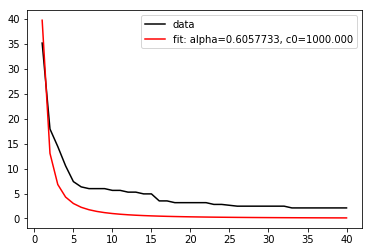

In [65]:
plt.plot(x, y, 'b-', label='data', color="black")
plt.plot(x, pdf(x, *popt), 'r-', label='fit: alpha=%5.7f, c0=%5.3f' % tuple(popt))
plt.legend()
plt.show()

При установлении ограничения на $c_0$ функция распределения и данные не совпадают

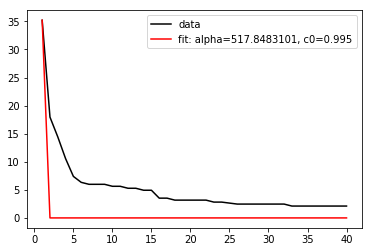

In [66]:
x=pdata["Rating"].values
y=pdata["Population"].values
popt, pcov = curve_fit(pdf, x, y,bounds=([0,0.99], [1000, 1])) #Подбор параметров для минимального СКО
plt.plot(x, y, 'b-', label='data', color="black")
plt.plot(x, pdf(x, *popt), 'r-', label='fit: alpha=%5.7f, c0=%5.3f' % tuple(popt))
plt.legend()
plt.show()